<a href="https://colab.research.google.com/github/Anya232536/project_ml/blob/main/HW_ML_04_05_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кейс по моделированию

### Данные

Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий, превысит ли средний заработок человека порог $50k

#### Как оценить качество алгоритма

Будем смотреть на показатель Area Under ROC Curve (ROC_AUC). Напомню, что он тем выше, чем мы правильнее упорядочиваем наши предсказанные "вероятности".

#### Делаем важные импорты

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### Данные

1) age (Возраст): continuous.

2) workclass (Информация о работе): Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

3) fnlwgt (Вещественный признак - анонимен): continuous.

4) education (Образование): Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

5) education-num: continuous.

6) marital-status (Семейное положение): Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

7) occupation (Род деятельности): Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

8) relationship (Статус в семье): Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

9) race (Раса): White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

10) sex (Пол): Female, Male.

11) capital-gain (Размер капитала): continuous.

12) capital-loss (Фича на основе капитала): continuous.

13) hours-per-week (Сколько часов в неделю работает): continuous.

14) >50K,<=50K (Ваш таргет)

#### Скачиваем данные

In [ ]:
# В данной таблице NaNы заполнены значком '?' - заменим его на проспуски с помощью параметра "na_values"
data_adult = pd.read_csv("HW_ML_04-05_data.adult.csv", na_values='?')
data_adult.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16280 non-null  int64 
 1   workclass       15351 non-null  object
 2   fnlwgt          16280 non-null  int64 
 3   education       16280 non-null  object
 4   education-num   16280 non-null  int64 
 5   marital-status  16280 non-null  object
 6   occupation      15347 non-null  object
 7   relationship    16280 non-null  object
 8   race            16280 non-null  object
 9   sex             16280 non-null  object
 10  capital-gain    16280 non-null  int64 
 11  capital-loss    16280 non-null  int64 
 12  hours-per-week  16280 non-null  int64 
 13  >50K,<=50K      16280 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.7+ MB


### 1. Анализ


- Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.

- Проведите анализ (количество строк, количество строк после удаления (use df.shape),...)

In [ ]:
# use pd.isnull, data_adult.dropna
data_adult = data_adult.replace ( r'^\s\*$' , np.nan , regex= True )
data_adult = data_adult.dropna(how='any')
data_adult = data_adult.reset_index(drop=True)
print(data_adult.shape)
data_adult


(15347, 14)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15342,25,Local-gov,514716,Bachelors,13,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40,<=50K
15343,32,Private,207668,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,45,>50K
15344,27,Private,104457,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,Male,0,0,40,<=50K
15345,59,State-gov,268700,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,<=50K


**(1 балл)**
- Выделите целевую переменную (наш таргет) в отдельную переменную (назовите ее 'target')
- Преобразуйте к бинарному формату ({0,1})
- Удалите из датасета старую переменную.
- Посмотрите распределение целевой переменной

<Axes: >

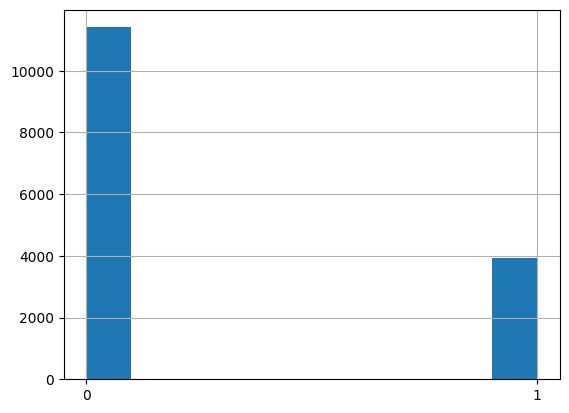

In [ ]:
target =data_adult['>50K,<=50K']
target = target.str.replace('>50K', '1')
target = target.str.replace('<=50K', '0')
data_adult = data_adult.drop(['>50K,<=50K'], axis=1)
target
#распределение целевой переменной
target.hist()

**(1 балл)**
- Постройте гистограмму распределения признака "capital-gain" с количеством бинов=50
- Посмотрите процентное соотношение категорий в колонке "workclass"

Private             0.735127
Self-emp-not-inc    0.086271
Local-gov           0.069525
State-gov           0.042028
Self-emp-inc        0.036554
Federal-gov         0.030038
Without-pay         0.000456
Name: workclass, dtype: float64

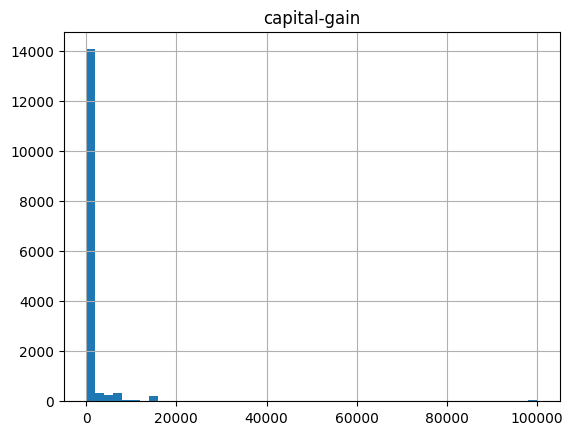

In [ ]:
# use df\['needed column'\].hist(bins=...), df\['needed column'\].value_counts
data_adult.hist (column='capital-gain', bins = 50)
data_adult['workclass'].value_counts(normalize=True)

### 2. Категориальные признаки

Как вы могли заметить, среди признаков есть категориальные.

**(1 балл)**
- Выделите 3 переменные (cat - список категориальных признаков, num - список вещественных признаков, target - таргет (строка));
- Закодируйте категориальные признаки;
- Выберите признаки для обучения.

Чтобы понять, какие признаки категориальные, используйте:
- df.dtypes,
- df\[col\].value_counts,
- df\[col\].nunique
- ...

In [ ]:

cat = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex"]
num = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
target

0        0
1        0
2        0
3        0
4        1
        ..
15342    0
15343    1
15344    0
15345    0
15346    1
Name: >50K,<=50K, Length: 15347, dtype: object

In [ ]:

data_adult = pd.get_dummies(data_adult, columns=["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex"])


In [ ]:
train_columns = data_adult.columns.difference(["fnlwgt", "education-num", "marital-status_Divorced", "marital-status_Married-AF-spouse", "marital-status_Married-civ-spouse", "marital-status_Married-spouse-absent", "marital-status_Never-married", "marital-status_Separated", "marital-status_Widowed", "relationship_Husband", "relationship_Not-in-family", "relationship_Other-relative", "relationship_Own-child", "relationship_Unmarried", "relationship_Wife"])
data_adult = data_adult[data_adult.columns.difference(["fnlwgt", "education-num", "marital-status_Divorced", "marital-status_Married-AF-spouse", "marital-status_Married-civ-spouse", "marital-status_Married-spouse-absent", "marital-status_Never-married", "marital-status_Separated", "marital-status_Widowed", "relationship_Husband", "relationship_Not-in-family", "relationship_Other-relative", "relationship_Own-child", "relationship_Unmarried", "relationship_Wife"])]
data_adult

,age,capital-gain,capital-loss,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,...,race_White,sex_Female,sex_Male,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,34,594,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,40,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,36,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
3,22,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
4,47,15024,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15342,25,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
15343,32,15024,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
15344,27,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
15345,59,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


### 3. Нормализация данных

**(1 балл)**
- Проведите анализ шкал признаков (Какого порядка вещественные признаки?) Можно с помощью гистограммы.
- Напишите, к каким проблемам может привести разница в шкалах различных признаков.

Может возникнуть проблема с корректной работой различных алгоритмов, то есть возможна неустойчивость работы модели, ухудшение результатов обучения и замедления процесса моделирования
- На какие алгоритмы машинного обучения может повлиять данная проблема и почему.

1) K-NN, так как этот алгоритм основан на расстояние, нормировка может значительно на него повлиять

2) Логистическая регрессия, так как этот алгоритм основан на дисперсии значений
- На какие алгоритмы машинного обучения не влияет масштабирование данных.

1) Агоритм деревьев решений или случайные леса, они ищут наилучшую точку разделения в каждой функции, это определяется процентным соотношением, следовательно, нормировка не оказывает существенного влияния

array([[<Axes: title={'center': 'hours-per-week'}>]], dtype=object)

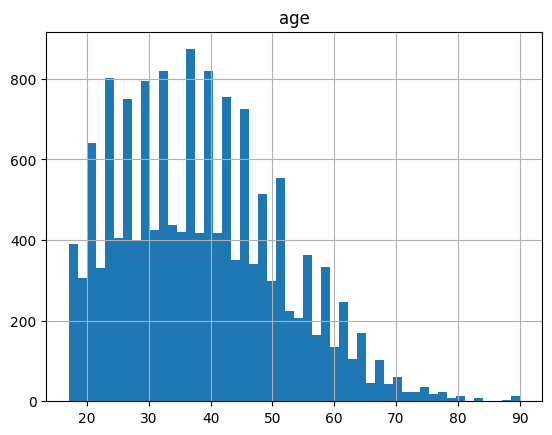

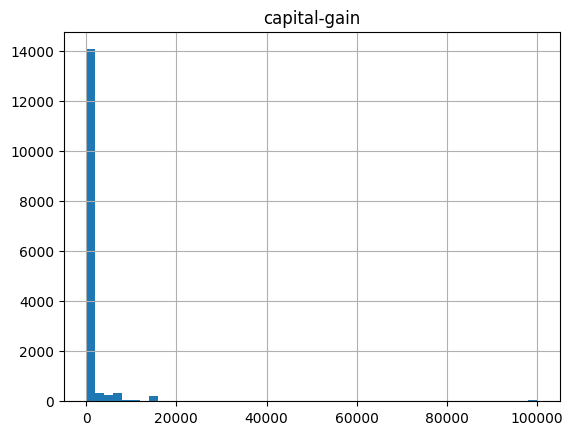

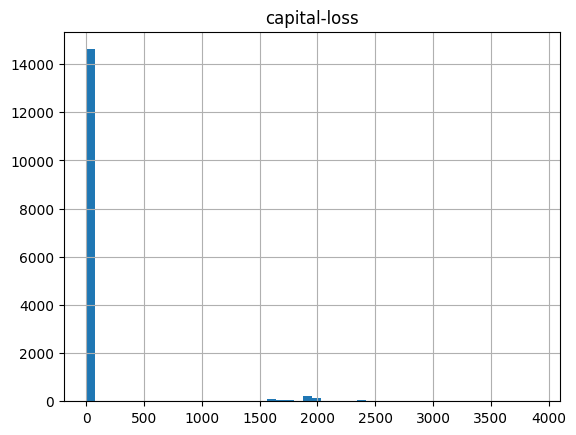

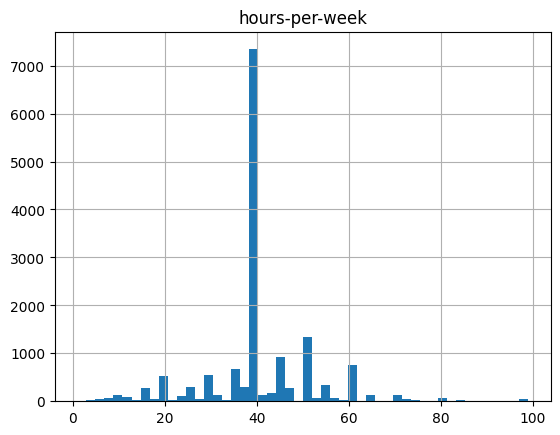

In [ ]:
data_adult.hist (column='age', bins = 50)
data_adult.hist (column='capital-gain', bins = 50)
data_adult.hist (column='capital-loss', bins = 50)
data_adult.hist (column='hours-per-week', bins = 50)


**(1 балл)**
- Масштабируйте данные
- Выделите отдельно X (ваши признаки) и y - ваша колонка таргета

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
scaler = scaler.fit_transform(data_adult)
X = pd.DataFrame(scaler, columns=train_columns)
y = target




Далее используйте масштабированные признаки

### 4. Валидация

В нашем случае будем валидироваться с помощью KFold + сохранение баланса классов в каждом "фолде" с помощью StratifiedKFold из sklearn.model_selection

**(1 балл)**

Расскажите:
- Какие виды валидации вы знаете?

1) Случайное разбиение на тестовую и обучающую выборку

2) Кросс-валидация
- Какие минусы и плюсы каждого подхода к валидации?

1) Плюсы и минусы случайного разбиения на тестовую и обучающую выборку:

Плюсы: борется с переобучением; более быстрая, чем кросс-валидации

Минусы: плохо работает с зависимыми данными; используются не все данные, что может снизить объективность проверки

2) Плюсы и минусы кросс - валидации :

Плюсы: используются все данные, что удобно, если данных мало; получается больше метрик; возможность работать с зависимыми данными.

Минусы: довольно долго по времени


- В чем преимущество StratifiedKFold над KFold?

KFold - это средство перекрестной проверки, которое просто делит набор данных на k фолдов, тогда как StratifiedKFold  предназначена для обеспечения того, чтобы каждый фолд набора данных имел одинаковую долю наблюдений с заданной меткой.



### 5. Выбор алгоритма и оптимизация

При подборе алгоритма будем варьировать не один параметр, а несколько в каждом алгоритме.

Выберем 3 алгоритма:

 - kNN (подробнее [здесь](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html))
 - SGD Linear Classifier (подробнее [здесь](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html))
 - RandomForest (подробнее [здесь](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))


### 5.1 kNN

**(3 балла)**
- Инициализируйте дефолтную модель (модель с дефолтными гиперпараметрами).
- Инициализируйте GridSearchCV для подбора гиперпараметров (подробнее [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)). Не забудьте задать параметр cv (число фолдов выберите из диапазона от 3 до 10).
- Подберите наилучшие параметры для модели с помощью GridSearchCV.
- Постройте график зависимости качества ROC_AUC от параметров (получается 2 графика) с доверительным интервалом. Ось Х - значения параметра, ось Y - значения ROC_AUC.

Подберите оптимальные параметры:
- Число соседей (**n_neighbors**) Перебирайте в диапазоне от 0 до 50.
- Метрика (**metric**) Перебирайте из \['minkowski', 'euclidean', 'chebyshev', 'manhattan'\].

Если подбор занимает очень много времени:
* Задайте значение параметра n_jobs=-1.
* Перебирайте значения из диапазона с шагом 2-5.

Для построения графика зависимости качества модели от показателя metric по оси идут 4 категории метрики. Для построения подобного графика, используйте xticks из pylab. Подробнее [здесь](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html) Потыкайте на картиночки, там откроется код.

Чтобы взять лучшую модель из GridSearchCV используйте метод gsCV.best_estimator_ после того, как обучите GridSearchCV на подбор лучших гиперпараметров.

gsCV.best_estimator_ вернет модель с наилучшими гиперпараметрами с точки зрения качества roc_auc на кросс-валидации.

Чтобы посмотреть параметры лучшей модели, используйте gsCV.best_params_

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X,y)
knn2 = KNeighborsClassifier()
params = {"n_neighbors": np.arange(1, 51, 5), "metric": ['minkowski', 'euclidean', 'chebyshev', 'manhattan']}
knn_gscv = GridSearchCV(estimator=knn2, param_grid=params, cv=5, n_jobs=-1, scoring='roc_auc')
knn_gscv.fit(X, y)
knn_gscv.best_params_


{'metric': 'manhattan', 'n_neighbors': 46}

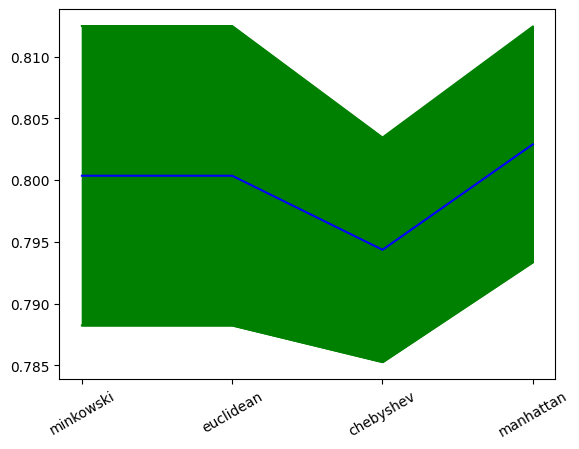

In [ ]:
import pylab as pl
x_kNN = range(4)
result = np.zeros(4)
error = np.zeros(4)
xTicks = ['minkowski', 'euclidean', 'chebyshev', 'manhattan']
for i in range(4):
  knn = KNeighborsClassifier(n_neighbors = 21, metric = xTicks[i])
  knn.fit(X,y)
  kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=True)
  results = model_selection.cross_val_score(knn, X, y, cv=kfold)
  result[i] = results.mean()
  error[i]=1.95*results.std()
# rotation - поварьируйте (это угол поворота названий категорий гиперпараметров)
pl.xticks(range(4), xTicks, rotation=30)
pl.plot(x_kNN, result, color="blue")
pl.plot(x_kNN, result - error, color = 'green')
pl.plot(x_kNN, result + error, color = 'green')
pl.fill_between(x_kNN, result - error, result + error, color = 'green')

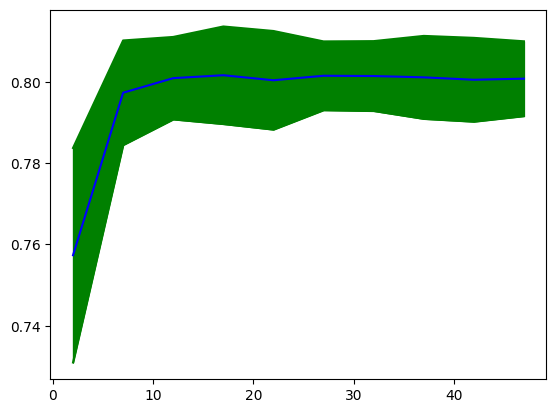

In [ ]:
import pylab as pl
x_kNN = list(range(1,51,5))
result = []
error = []
err = []
err1 = []
for i in range(1,51, 5):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X,y)
  kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=True)
  results = model_selection.cross_val_score(knn, X, y, cv=kfold)
  result.append(results.mean())
  error.append(1.95*results.std())
for i in range(len(x_kNN)):
  x_kNN[i] = x_kNN[i]+1
for i in range(len(error)):
  err.append(result[i]-error[i])
  err1.append(result[i]+error[i])
pl.plot(x_kNN, result, color="blue")
pl.plot(x_kNN, err, color = 'green')
pl.plot(x_kNN, err1, color = 'green')
pl.fill_between(x_kNN, err, err1, color = 'green')

### 5.2 SGD Linear Classifier

**(3 балла)**
- Инициализируйте дефолтную модель (модель с дефолтными гиперпараметрами)
- Инициализируйте GridSearchCV для подбора гиперпараметров (подробнее [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)). Не забудьте задать параметр cv (число фолдов выберите из диапазона от 3 до 10).
- Подберите наилучшие параметры для модели с помощью GridSearchCV.
- Постройте график зависимости качества ROC_AUC от параметров (получается 2 графика) с доверительным интервалом. Ось Х - значения параметра, ось Y - значения ROC_AUC.

Подберите оптимальные параметры:
- Loss функция (**loss**) Перебирайте из \['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive'\]
- Вид штрафа (**penalty**) Перебирайте из \['none', 'l2', 'l1', 'elasticnet'\]


Для построения графика зависимости качества модели от показателей loss, penalty по оси "x" идут категории. Для построения подобного графика, используйте xticks из pylab. Подробнее [здесь](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html) Потыкайте на картиночки, там откроется код.

Чтобы взять лучшую модель из GridSearchCV используйте метод gsCV.best_estimator_ после того, как обучите GridSearchCV на подбор лучших гиперпараметров.

gsCV.best_estimator_ вернет модель с наилучшими гиперпараметрами с точки зрения качества roc_auc на кросс-валидации.

Чтобы посмотреть параметры лучшей модели, используйте gsCV.best_params_

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X, y)
clf1 = SGDClassifier()
params = {'loss':['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'log_loss', 'huber', 'epsilon_insensitive'], 'penalty':[None, 'l2', 'l1', 'elasticnet']}
sgd_gscv = GridSearchCV(estimator=clf1, param_grid=params, cv=5, n_jobs=-1, scoring='roc_auc')
sgd_gscv.fit(X, y)
sgd_gscv.best_params_


{'loss': 'log', 'penalty': 'l1'}

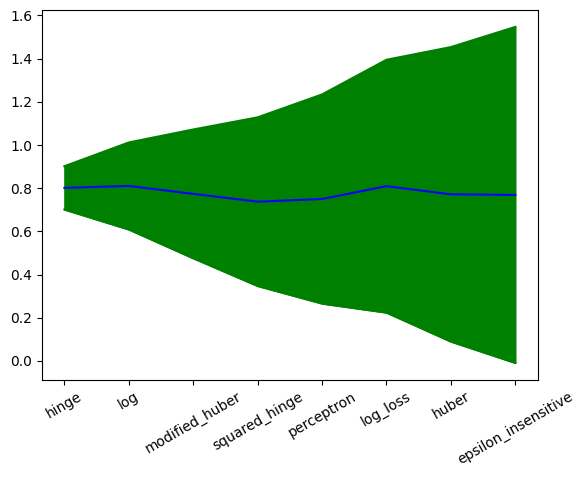

In [ ]:
import pylab as pl
x_SGD = range(8)
result = np.zeros(8)
error = np.zeros(8)
xTicks = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'log_loss', 'huber', 'epsilon_insensitive']
for i in range(8):
  clf = SGDClassifier(loss=xTicks[i])
  clf.fit(X,y)
  kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=True)
  results = model_selection.cross_val_score(clf, X, y, cv=kfold)
  result[i] = results.mean()
  error[i] = result.mean()
# rotation - поварьируйте (это угол поворота названий категорий гиперпараметров)
pl.xticks(range(8), xTicks, rotation=30)
pl.plot(x_SGD, result, color="blue")
pl.plot(x_SGD, result - error, color = 'green')
pl.plot(x_SGD, result + error, color = 'green')
pl.fill_between(x_SGD, result - error, result + error, color = 'green')

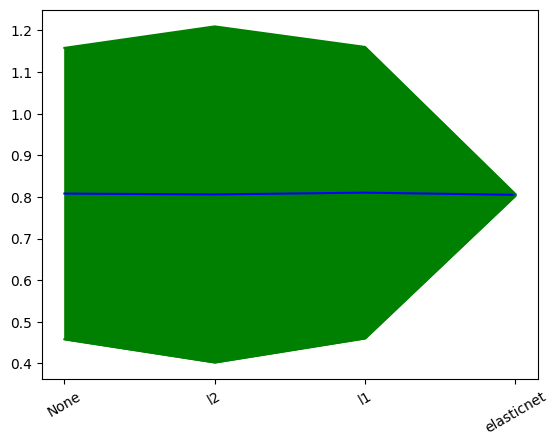

In [ ]:
import pylab as pl
x_SGD = range(4)
result = np.zeros(4)
error = np.zeros(4)
xTicks = ["None", 'l2', 'l1', 'elasticnet']
xTicks1 = [None, 'l2', 'l1', 'elasticnet']
for i in range(4):
  clf = SGDClassifier(penalty=xTicks1[i])
  clf.fit(X,y)
  kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=True)
  results = model_selection.cross_val_score(clf, X, y, cv=kfold)
  result[i] = results.mean()
  error[i] = result.std()
# rotation - поварьируйте (это угол поворота названий категорий гиперпараметров)
pl.xticks(range(4), xTicks, rotation=30)
pl.plot(x_SGD, result, color="blue")
pl.plot(x_SGD, result - error, color = 'green')
pl.plot(x_SGD, result + error, color = 'green')
pl.fill_between(x_SGD, result - error, result + error, color = 'green')

### 5.3 RandomForestClassifier

**(3 балла)**
- Инициализируйте дефолтную модель (модель с дефолтными гиперпараметрами).
- Инициализируйте GridSearchCV для подбора гиперпараметров (подробнее [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)). Не забудьте задать параметр cv (число фолдов выберите из диапазона от 3 до 10).
- Подберите наилучшие параметры для модели с помощью GridSearchCV.
- Постройте график зависимости качества ROC_AUC от параметров (получается 2 графика) с доверительным интервалом. Ось Х - значения параметра, ось Y - значения ROC_AUC.

Подберите оптимальные параметры:
- Число деревьев (**n_estimators**) Перебирайте в диапазоне от 0 до 100
- Параметр максимального количества фичей для построения дерева (**max_features**) Перебирайте из \['auto', 'sqrt', 'log2', None\]
- Критерий разбиения на поддеревья (**criterion**) Перебирайте из \['gini', 'entropy'\]


Для построения графика зависимости качества модели от показателей max_features, criterion по оси "x" идут категории. Для построения подобного графика, используйте xticks из pylab. Подробнее [здесь](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html) Потыкайте на картиночки, там откроется код.

Чтобы взять лучшую модель из GridSearchCV используйте метод gsCV.best_estimator_ после того, как обучите GridSearchCV на подбор лучших гиперпараметров.

gsCV.best_estimator_ вернет модель с наилучшими гиперпараметрами с точки зрения качества roc_auc на кросс-валидации.

Чтобы посмотреть параметры лучшей модели, используйте gsCV.best_params_

#### Важно!!!

Число деревьев (**n_estimators**) перебирать с помощью GridSearchCV НЕ НАДО!

Если задание ниже не получится (можете по-старинке перебирать (но придется долго ждать))

**(2 балла)**

Подберём число деревьев (n_estimators) в алгоритме RandomForest, начиная с которого качество стабилизируется. Выполните задание одним из предложенных способов (можете сделать двумя, а потом сравнить их результаты).

_Способ 1_
1. Разбейте выборку на обучающую и тестовую с помощью train_test_split.
2. Для каждого числа деревьев:
  - Обучите модель на обучающей выборке
  - Посчитайте скор на тестовой выборке
  - Сохраните скор
3. Проанализируйте зависимость качества предсказания модели от числа деревьев (постройте график).
4. Напишите какое оптимальное количество деревьев следует использовать и почему.

_Способ 2_
1. Для каждого числа деревьев:
  - Посчитайте скор, используя cross_val_score
  - Сохраните скор
3. Проанализируйте зависимость качества предсказания модели от числа деревьев (постройте график).
4. Напишите какое оптимальное количество деревьев следует использовать и почему.

В дальнейших экспериментах используйте подобранное количество деревьев.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

#### Сначала подберите оптимальное количество деревьев, зафиксируйте, затем другие параметры.

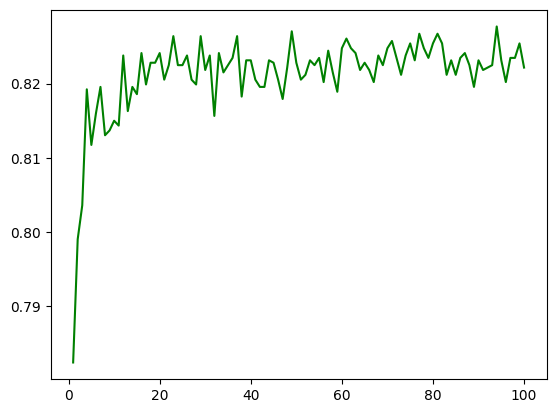

In [ ]:
max_trees_number = 100
trees = range(1,101)
result = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # для способа 1

# Подсказка
for current_trees_number in range(1, 101):
    # инициализируем модель
    RFC_model = RandomForestClassifier(n_estimators= current_trees_number)
    # обучаем модель
    RFC_model.fit(X_train, y_train)
    # считаем скор
    l = RFC_model.score(X_test, y_test)
    # сохраняем скор
    result.append(l)
k = (result.index(max(result)))+1
plt.plot(trees, result, color = "green")

In [ ]:
RFS = RandomForestClassifier(n_estimators= k, max_features = "auto", criterion = "gini")
RFS.fit(X, y)
RFS1 = RandomForestClassifier(n_estimators= k)
params = {'max_features':['auto', 'sqrt', 'log2', None], 'criterion':['gini', 'entropy']}
rfs_gscv = GridSearchCV(estimator=RFS1, param_grid=params, cv=5, n_jobs=-1, scoring='roc_auc')
rfs_gscv.fit(X, y)
print("Оптимальное число деревьев: ", k)
rfs_gscv.best_params_

Оптимальное число деревьев:  94


{'criterion': 'entropy', 'max_features': None}

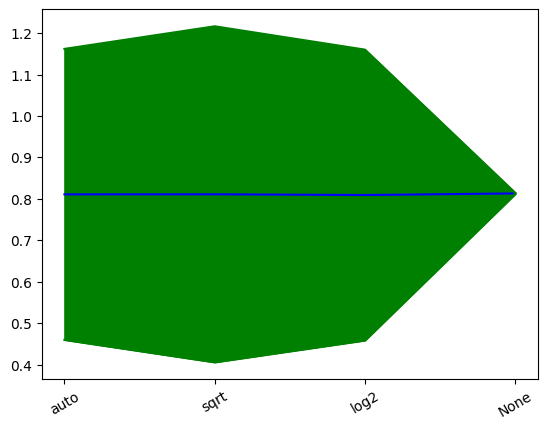

In [ ]:
import pylab as pl
x_RFC = range(4)
result = np.zeros(4)
error = np.zeros(4)
xTicks = ['auto', 'sqrt', 'log2', None]
xTicks1 = ['auto', 'sqrt', 'log2', "None"]
for i in range(4):
  RFS = RandomForestClassifier(n_estimators= k, max_features = xTicks[i])
  RFS.fit(X,y)
  kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=True)
  results = model_selection.cross_val_score(RFS, X, y, cv=kfold)
  result[i] = results.mean()
  error[i] = result.std()
# rotation - поварьируйте (это угол поворота названий категорий гиперпараметров)
pl.xticks(range(4), xTicks1, rotation=30)
pl.plot(x_RFC, result, color="blue")
pl.plot(x_RFC, result - error, color = 'green')
pl.plot(x_RFC, result + error, color = 'green')
pl.fill_between(x_RFC, result - error, result + error, color = 'green')

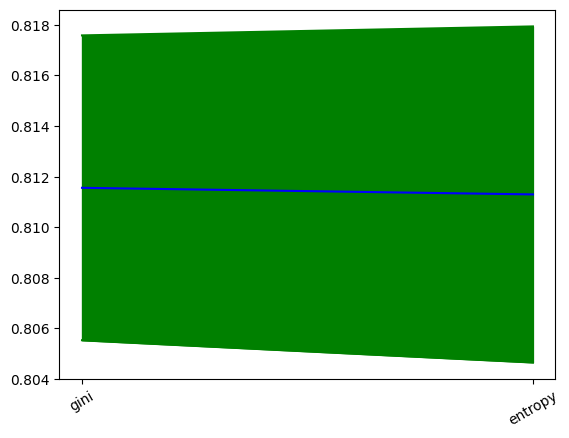

In [ ]:
import pylab as pl
x_RFC = range(2)
result = np.zeros(2)
error = np.zeros(2)
xTicks = ['gini', 'entropy']
for i in range(2):
  RFS = RandomForestClassifier(n_estimators= k, criterion = xTicks[i])
  RFS.fit(X,y)
  kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=True)
  results = model_selection.cross_val_score(RFS, X, y, cv=kfold)
  result[i] = results.mean()
  error[i] = results.std()
# rotation - поварьируйте (это угол поворота названий категорий гиперпараметров)
pl.xticks(range(2), xTicks, rotation=30)
pl.plot(x_RFC, result, color="blue")
pl.plot(x_RFC, result - error, color = 'green')
pl.plot(x_RFC, result + error, color = 'green')
pl.fill_between(x_RFC, result - error, result + error, color = 'green')

### 6. Ансамбль моделей

**(2 балла)**

Попробуйте "заблендить" модели (сложить результаты (ответы) разных алгоритмов) с разными коэффициентами перед ними.

Попробуйте различные комбинации алгоритмов. А так же все три алгоритма вместе.

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

Подробнее про ансамбли: [здесь](https://dyakonov.org/2017/03/10/cтекинг-stacking-и-блендинг-blending/)

Простой пример использования VotingClassifier и его описание можно найти в официальной документации: [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)


In [ ]:
# Библиотека для блендинга
from sklearn.ensemble import VotingClassifier



1.



In [ ]:
kNN_model = knn_gscv.best_estimator_
clf_model = sgd_gscv.best_estimator_
rfc_model = rfs_gscv.best_estimator_
vc = VotingClassifier([('kNN', kNN_model), ('clf', clf_model)], voting='soft')
grid = GridSearchCV(estimator=vc, param_grid={'weights': [[i, 1 - i] for i in np.arange(0,1.1,0.1)]}, cv=5, n_jobs = -1, scoring='roc_auc')
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)


{'weights': [0.5, 0.5]}
0.8520255458282774


In [ ]:
vc1 = VotingClassifier([('kNN', kNN_model), ('rfc', rfc_model)], voting='soft')
grid1 = GridSearchCV(estimator=vc1, param_grid={'weights': [[i, 1 - i] for i in np.arange(0,1.1,0.1)]}, cv=5, scoring='roc_auc')
grid1.fit(X, y)
print(grid1.best_params_)
print(grid1.best_score_)

{'weights': [0.6000000000000001, 0.3999999999999999]}
0.8587281308923848


In [ ]:
vc2 = VotingClassifier([('clf', clf_model), ('rfc', rfc_model)], voting='soft')
grid2 = GridSearchCV(estimator=vc2, param_grid={'weights': [[i, 1 - i] for i in np.arange(0,1.1,0.1)]}, cv=5, scoring='roc_auc')
grid2.fit(X, y)
print(grid2.best_params_)
print(grid2.best_score_)

{'weights': [0.6000000000000001, 0.3999999999999999]}
0.8620467268483001


In [ ]:
vc3 = VotingClassifier([('kNN', kNN_model), ('clf', clf_model), ('rfc', rfc_model)], voting='soft')
params = {'weights':[[0.3, 0.3, 0.4], [0.1, 0.1, 0.8], [0.35, 0.25, 0.4]]}
grid3 = GridSearchCV(estimator=vc3, param_grid=params, cv=5, scoring='roc_auc')
grid3.fit(X, y)
print(grid3.best_params_)
print(grid3.best_score_)

{'weights': [0.3, 0.3, 0.4]}
0.8632638179666585


### 7. Ящик с усами

**(2 балла)**

Давайте посмотрим визуально на качество наших моделей. Вы уже знаете, какие гиперпараметры для наших моделей являются наилучшими. Зафиксируйте данные параметры:

In [ ]:
best_model_knn = KNeighborsClassifier(n_neighbors = 46, metric = 'manhattan') # Можно ручками или через .best_params_ или .best_model_
best_model_random_forest = RandomForestClassifier(n_estimators= k, max_features = None, criterion = "entropy" )  # Можно ручками или через .best_params_ или .best_model_
best_model_sgd = SGDClassifier(loss="log", penalty = "l1")  # Можно ручками или через .best_params_ или .best_model_
best_model_voting_classifier = grid3

Посмотрим на наше качество на кросс_валидации:

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# В качестве cv возьмите StratifiedKFold с 7 фолдами
vc = model_selection.StratifiedKFold(n_splits=7)
cv_score_knn = model_selection.cross_val_score(estimator=best_model_knn, X=X, y=y, cv=vc, scoring='roc_auc')
cv_score_random_forest = model_selection.cross_val_score(estimator=best_model_random_forest, X=X, y=y, cv=vc, scoring='roc_auc')
cv_score_sgd = cross_val_score(estimator=best_model_sgd, X=X, y=y, cv=vc, scoring='roc_auc')
cv_score_voting_classifier = cross_val_score(estimator=grid3, X=X, y=y, cv=vc, scoring='roc_auc')

Создайте таблицу pandas.DataFrame с колонками названиями методов (4 колонки), а значения - выход функции cross_val_score

In [ ]:
r = []
r.append(cv_score_knn.mean())
r.append(cv_score_random_forest.mean())
r.append(cv_score_sgd.mean())
r.append(cv_score_voting_classifier.mean())
final_result = pd.DataFrame([r], columns=["Knn"," forest","sgd","voting_classifier" ])
final_result

,Knn,forest,sgd,voting_classifier
0,0.827605,0.843166,0.841557,0.859982


Запустите код ниже

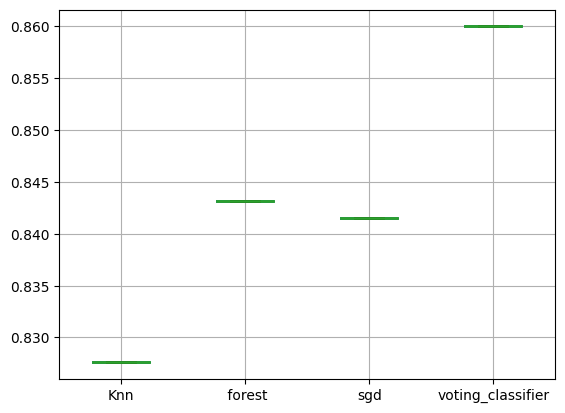

In [ ]:
ax = final_result.boxplot()
_ = plt.setp(ax.lines, linewidth=2.0)
plt.show()

### 8. Выводы

**(1 балл)**
По графику выше сделайте вывод:
- Какой алгоритм "победил в соревновании" за качество?
- Лучший алгоритм с точки зрения качества/скорости работы (иногда это очень важно)
- Опишите каждый алгоритм (вкратце), его плюсы и минусы

Судя по таблице, наилучшей результат дает комбинация всех трех алгоритмов. Если не учитывать комбинацию алгоритмов, то "побеждает" RandomForestClassifier.

Наиболее быстро работает алгоритм sgd и для него быстрее подбирать оптимальные параметры

KNN: Имеется набор данных, для каждого задается класс. Затем при обучение алгоритм запоминает векторы признаков наблюдений и их метки классов, также задается число K соседей, которое будет использоваться при классификации. Затем вычисляется расстояние до кадой точки, сортируется по возрастанию и отбираются первые K значений, среди этих точек определяется класс текущей точки из обучающейся выборки

Плюсы: устойчивость к выбросам

Недостатки: чувствителен к масштабу признаков; затратный в вычислительном плане; отсутсвуют правила классификации

SGD: алгоритм аппроксимирует истинный градиент градиентом одного обучающего примера. Пробегая через обучающее множество, алгоритм осуществляет приведённый выше пересчёт для каждого обучающего примера. Для достижения сходимости алгоритма может потребоваться несколько проходов по обучающему набору данных.  

Плюсы: эффективность; простота реализации

Минсы: требует ряда гиперпараметров, таких как параметр регуляризации и количество итераций;чувствителен к масштабированию

RandomForestClassifier: алгоритм строит по выборке дерево решений до тех пор, пока в каждом листе не более n объектов, или пока не будет достигнута определенная высота, затем будет получен результат прогнозирования из каждого дерева решений.
На этом этапе голосование будет проводиться для каждого прогнозируемого результата:выбирается лучший признак, делаем разбиение в дереве по нему и повторяем этот пункт до исчерпания выборки.
В конце выбирается результат прогноза с наибольшим количеством голосов. Это и есть окончательный результат прогнозирования.

Плюсы: непредвзятый алгоритм; хорошо работает как с категориальными, так и с количественными признаками

Минусы: требует большого количества вычислительных ресурсов и времени для обучения


_____